In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from IPython.display import Markdown
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


# **Problem Statement**
The goal of this competition is to predict a customer's purchase value based on their multi-session behavior across digital touchpoints. The dataset captures anonymized user interactions, such as browser types, traffic sources, device details, and geographical indicators. By modeling these patterns, participants will estimate the purchase potential of each user, helping optimize marketing and engagement strategies.


# **Dataset Description**
This dataset captures session-level information from a large-scale digital commerce platform. Each row corresponds to a unique user session and includes data on user behavior, acquisition channels, device information, and geographical location.

### Key Features:
- **User Behavior & Session Metrics:** Indicators of user engagement and session activity.
- **Device & Technical Attributes:** Details about the user's device and browsing environment.
- **Traffic & Marketing Source:** Insights into how users arrived at the platform.
- **Geographical Context:** Helps understand regional behavior trends.
- **Identifiers:** Unique identifiers for each user and session.
- **Target Variable:** The amount spent during the session (purchaseValue), which is to be predicted.


In [ ]:
#######################################

# **Data Loading**

In [15]:
# Load train and test data
train_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')
test_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')

# Load sample submission
sample_submission = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv')



In [16]:
train_df.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


In [17]:
test_df.head()

,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,...,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,geoCluster,browserMajor,screenSize,gclIdPresent
0,Social,20170508,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,groups.google.com,1494262567,2,1494262567,59555,8,Region_2,not available in demo dataset,medium,0
1,Organic Search,20170405,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1491433811,1,1491433811,6394,8,Region_1,not available in demo dataset,medium,0
2,Organic Search,20170308,Safari,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1489001815,1,1489001815,38969,8,Region_5,not available in demo dataset,medium,0
3,Referral,20171113,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,docs.google.com,1510593024,30,1510593024,120027,8,Region_2,not available in demo dataset,medium,0
4,Organic Search,20161212,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(direct),1481559809,1,1481559809,69453,8,Region_3,not available in demo dataset,medium,0


# **Exploratory Data Analysis**



In [18]:
print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)
print('Sample Submission shape:', sample_submission.shape)


Train shape: (116023, 52)
Test shape: (29006, 51)
Sample Submission shape: (29006, 2)


In [19]:
#summary of the dataset
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   userChannel                                   29006 non-null  object 
 1   date                                          29006 non-null  int64  
 2   browser                                       29006 non-null  object 
 3   device.browserSize                            29006 non-null  object 
 4   device.browserVersion                         29006 non-null  object 
 5   deviceType                                    29006 non-null  object 
 6   device.flashVersion                           29006 non-null  object 
 7   device.isMobile                               29006 non-null  bool   
 8   device.language                               29006 non-null  object 
 9   device.mobileDeviceBranding                   29006 non-null 

**Identify missing values that may require imputation or removal.**

In [21]:
display(Markdown("Null values in the Train data"))
missing_values = train_df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0]) 

Null values in the Train data

trafficSource.adContent                         113060
trafficSource.adwordsClickInfo.isVideoAd        111742
trafficSource.adwordsClickInfo.page             111742
trafficSource.adwordsClickInfo.adNetworkType    111742
trafficSource.adwordsClickInfo.slot             111742
trafficSource.referralPath                       73309
trafficSource.isTrueDirect                       73133
trafficSource.keyword                            71861
totals.bounces                                   68875
new_visits                                       35505
pageViews                                            8
dtype: int64


Columns with more than 90% missing values:
trafficSource.adContent                         97.446196
trafficSource.adwordsClickInfo.slot             96.310214
trafficSource.adwordsClickInfo.isVideoAd        96.310214
trafficSource.adwordsClickInfo.adNetworkType    96.310214
trafficSource.adwordsClickInfo.page             96.310214
dtype: float64


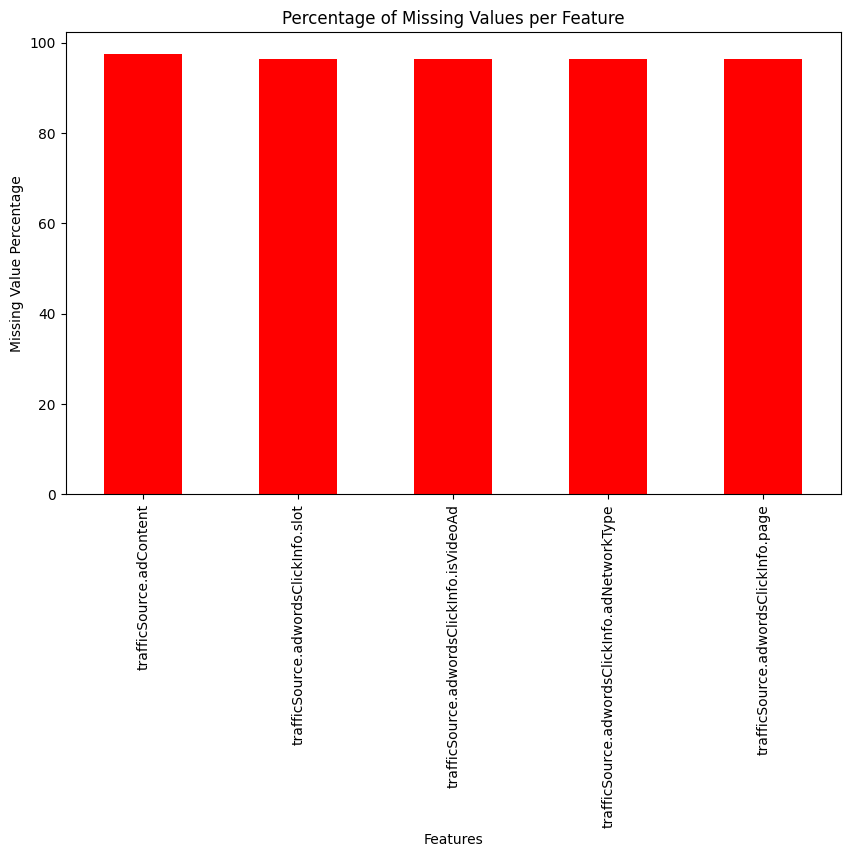

In [22]:
# Calculate percentage of missing values for each column in train_df
missing_pct = train_df.isnull().mean() * 100

# List columns with >90% missing values
high_missing_cols = missing_pct[missing_pct > 90].sort_values(ascending=False)

print("Columns with more than 90% missing values:")
print(high_missing_cols)

plt.figure(figsize=(10, 6))
high_missing_cols.plot(kind='bar', color='red')
plt.title('Percentage of Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Missing Value Percentage')
plt.show()


High Missingness: The features shown in the plot each have more than 96% missing values. These columns include trafficSource.adContent, several trafficSource.adwordsClickInfo.* fields, and similar.

**Target Variable Distribution**

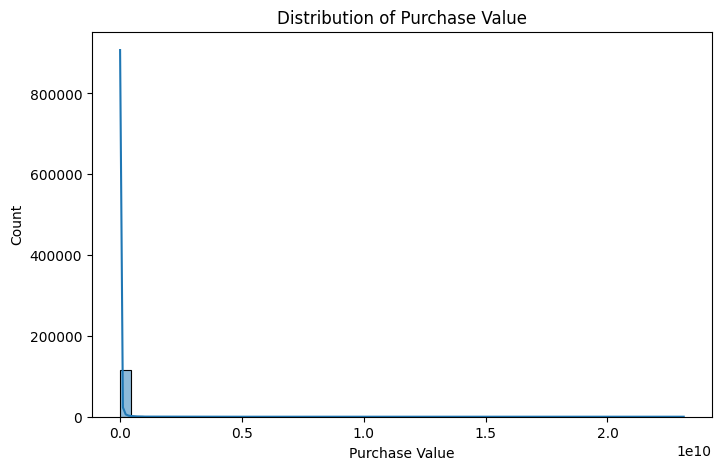

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(train_df['purchaseValue'], bins=50, kde=True)
plt.title('Distribution of Purchase Value')
plt.xlabel('Purchase Value')
plt.ylabel('Count')
plt.show()

First, I plotted the raw 'Purchase Value' from the dataset. This revealed a massive spike at zero and a very long right tail—showing extreme skew: most sessions have little or no purchase, but a few are very large.
To handle this, I applied a log transformation to the purchase value, which compressed the range and allowed us to see the true spread of the majority of values.
This is especially important because many predictive models work better with roughly symmetric or less-skewed targets. The log transformation reduces the impact of outliers and leads to more robust and interpretable results.


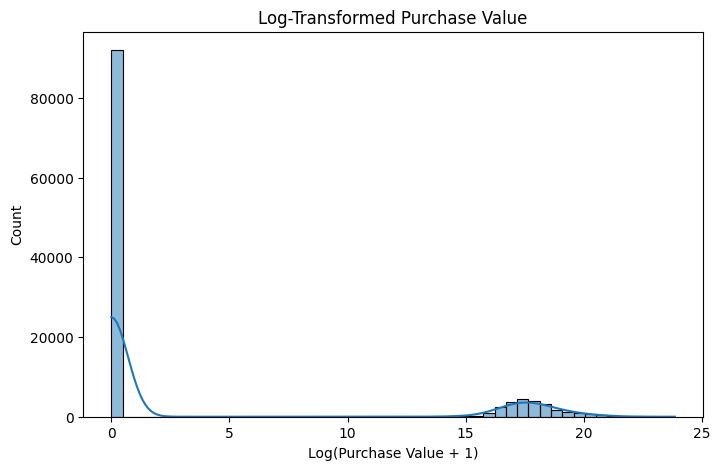

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(train_df['purchaseValue']), bins=50, kde=True)
plt.title('Log-Transformed Purchase Value')
plt.xlabel('Log(Purchase Value + 1)')
plt.ylabel('Count')
plt.show()

The plot shows the log-transformed distribution of purchase values.

Most sessions have very low or zero purchase values (large spike at the left), and a much smaller group has higher purchases (right tail).

This confirms the target is highly skewed, justifying the use of log transformation for better modeling and visualization.

**Boxplots by Category (Target vs Category)**

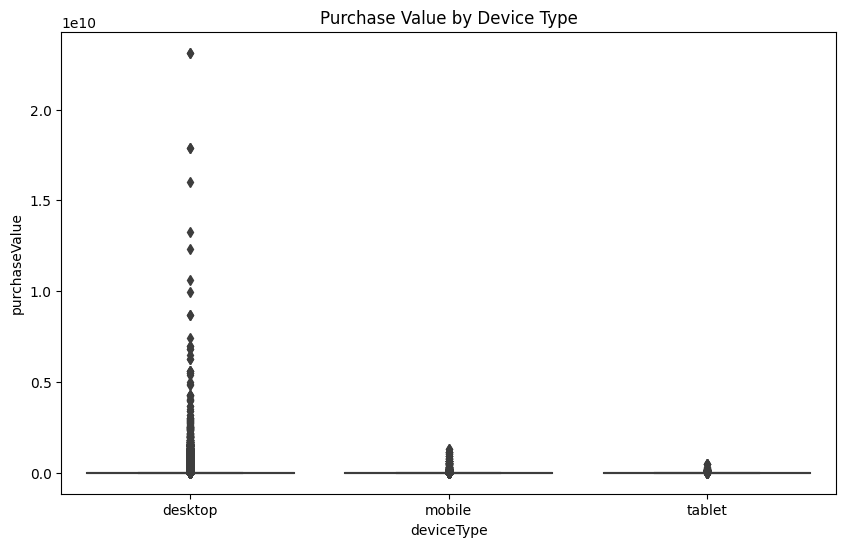

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='deviceType', y='purchaseValue', data=train_df)
plt.title('Purchase Value by Device Type')
plt.show()


This boxplot displays the distribution of purchase values by device type—desktop, mobile, and tablet. From the plot, it’s clear that almost all purchase sessions, regardless of device, involve small purchase values, but there are a few extremely large transactions, especially on desktop devices. These are visualized as outlier points above the main data cloud. This reveals two key insights: first, the purchase data is highly right-skewed; second, high-value purchases tend to occur more on desktop.

**Correlations Heatmap (Numeric Features)**

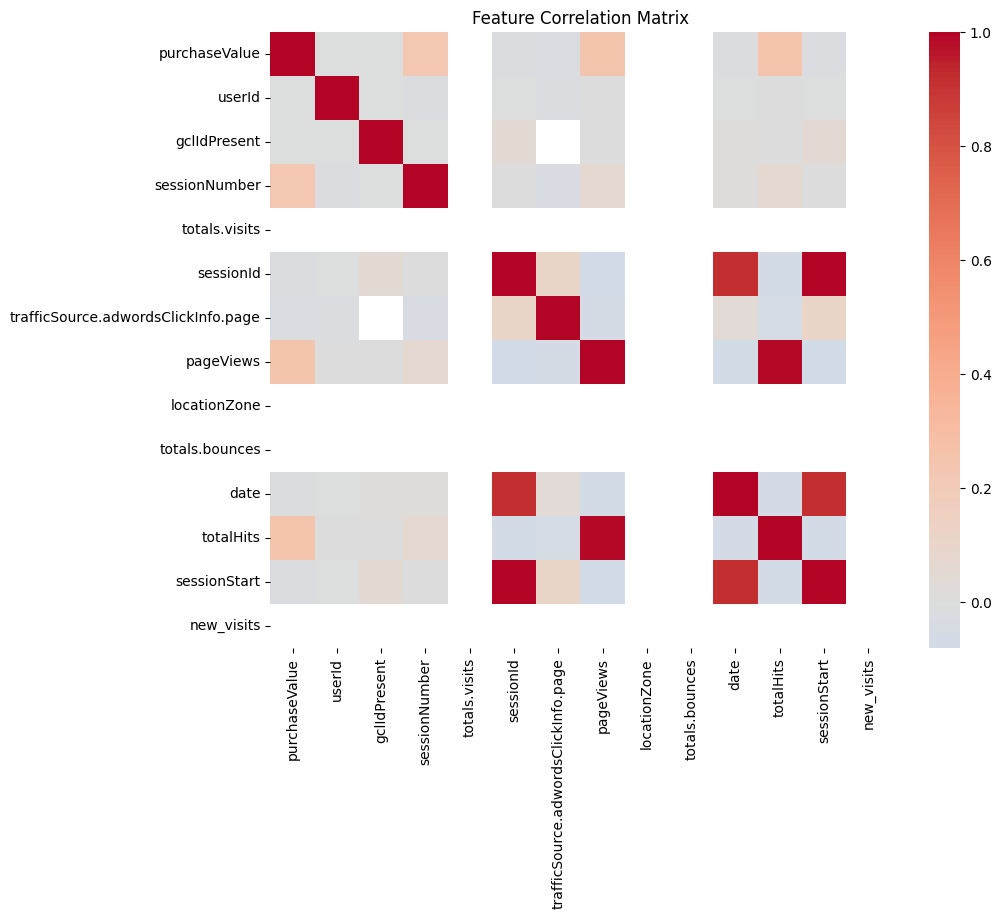

In [26]:
plt.figure(figsize=(10,8))
corr = train_df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()


This heatmap shows the pairwise correlation coefficients between important numeric features in the dataset. Most feature pairs have light colors, indicating weak or no relationship, and only a few feature pairs (shown in darker red) have moderate correlation. This means multicollinearity is not a major problem, so these features can be included together in most predictive models without risk of redundancy or instability. Stronger correlations, where present, may point to related behaviors or data-generation processes.

**Purchase Value by Categorical Features**

This bar graph displays the average purchase value for each device type.
Desktop users spend significantly more per transaction on average compared to mobile and tablet users, highlighting desktops as the most valuable channel for high-value purchases.

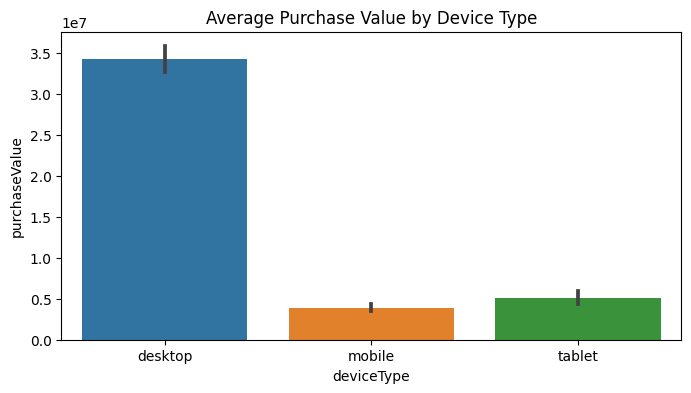

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(x='deviceType', y='purchaseValue', data=train_df, estimator=np.mean)
plt.title('Average Purchase Value by Device Type')
plt.show()


**Boxplots of Purchase Value by Category**

The boxplot shows considerable variation in purchase values across continents, with the Americas having both the broadest range and the highest median purchase value.
Other continents generally show lower purchase values with less variability, suggesting that geographic location plays a key role in purchasing behavior.



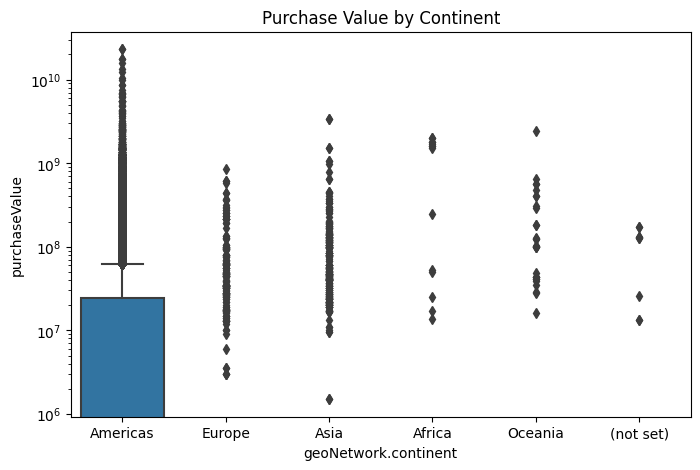

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x='geoNetwork.continent', y='purchaseValue', data=train_df)
plt.yscale('log')
plt.title('Purchase Value by Continent')
plt.show()


**Purchase Rate by Device Type**

The bar chart illustrates that desktop users have a much higher purchase rate compared to mobile and tablet users.
This suggests that sessions on desktops are considerably more likely to result in a purchase, highlighting desktops as the strongest channel for driving conversions in this dataset.



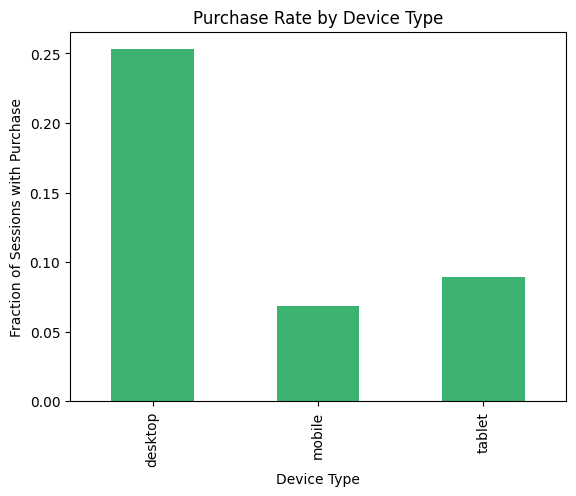

In [29]:
# Example with deviceType
conv_rate = train_df.groupby('deviceType')['purchaseValue'].apply(lambda x: (x > 0).mean())
conv_rate.plot(kind='bar', color='mediumseagreen')
plt.title('Purchase Rate by Device Type')
plt.ylabel('Fraction of Sessions with Purchase')
plt.xlabel('Device Type')
plt.show()


# FEATURE ENGINEERING

The code calculates the percentage of missing values for each column in the training set and identifies features with more than 90% missing data.
It then drops these high-missing columns from both train and test datasets, streamlining your data for modeling and reducing potential noise from mostly-empty features.

In [30]:
# Calculate missing percent in train set
missing_pct = train_df.isnull().mean() * 100
high_missing_cols = missing_pct[missing_pct > 90].index.tolist()

print(f"Columns to drop (>{90}% missing):")
print(high_missing_cols)

# Drop these columns from both train and test
train_df = train_df.drop(columns=high_missing_cols)
test_df = test_df.drop(columns=high_missing_cols)

print("New train shape:", train_df.shape)
print("New test shape:", test_df.shape)

Columns to drop (>90% missing):
['trafficSource.adContent', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.page']
New train shape: (116023, 47)
New test shape: (29006, 46)


The code compares the column sets of the training and test datasets to identify columns that exist only in one but not the other.
It prints out columns present exclusively in the training set and those exclusively in the test set.
This check is critical to ensure both datasets have consistent features, preventing errors or mismatches during modeling and prediction.

In [31]:
train_only_cols = set(train_df.columns) - set(test_df.columns)
test_only_cols = set(test_df.columns) - set(train_df.columns)

print("Columns only in train:", train_only_cols)
print("Columns only in test:", test_only_cols)


Columns only in train: {'purchaseValue'}
Columns only in test: set()


The code identifies columns in the training dataset that have only a single unique value (including NaNs) across all rows.
Such constant columns do not provide any useful information or variability for the model and can safely be removed to reduce dimensionality and improve model efficiency.

In [32]:
constant_cols = [col for col in train_df.columns if train_df[col].nunique(dropna=False) == 1]
print("Constant columns:", constant_cols)


Constant columns: ['device.screenResolution', 'screenSize', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'totals.visits', 'geoNetwork.networkLocation', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'locationZone', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']


In [33]:
train_df = train_df.drop(columns=constant_cols)
test_df = test_df.drop(columns=constant_cols)
print("Removed constant columns. Train shape:", train_df.shape)
print("Removed constant columns. Test shape:", test_df.shape)


Removed constant columns. Train shape: (116023, 30)
Removed constant columns. Test shape: (29006, 29)


Dropping Identifier and Target Columns:
It removes explicit identifier columns (userId, sessionId) and the target variable (purchaseValue) from the feature set X. This is crucial because identifiers do not carry predictive power, and the target should not be included as a feature during training.

Separating Features and Target:
Sets up X as the features dataframe and y as the target variable for model training.

Preparing Test Features:
Similarly processes X_test by dropping identifiers, ensuring consistency with the training features.

Handling Missing Numerical Data:
Missing values in numerical columns are filled with 0 in both X and X_test. This is a basic imputation strategy that can be effective if missing means absence or zero quantity.

In [34]:
# After cleaning both train_df and test_df

# 1. Drop explicit identifiers and target from features (adjust columns based on your dataset)
feature_drop = []
for col in ['userId', 'sessionId', 'purchaseValue']:
    if col in train_df.columns:
        feature_drop.append(col)
        
print("Dropping identifier/target columns from feature set:", feature_drop)

# 2. Set up X and y for training
X = train_df.drop(columns=feature_drop).copy()
y = train_df['purchaseValue'].copy()

# 3. Set up X_test for predictions
X_test = test_df.drop(columns=[col for col in ['userId', 'sessionId'] if col in test_df.columns]).copy()

# 4. Now, fill numerical columns with 0 for train and test features
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

X[numeric_cols] = X[numeric_cols].fillna(0)
X_test[numeric_cols] = X_test[numeric_cols].fillna(0)

print("✅ Filled missing values in numerical columns with 0 for X and X_test.")
print("Final X shape:", X.shape, "Final X_test shape:", X_test.shape)


Dropping identifier/target columns from feature set: ['userId', 'sessionId', 'purchaseValue']
✅ Filled missing values in numerical columns with 0 for X and X_test.
Final X shape: (116023, 27) Final X_test shape: (29006, 27)


The code iterates over all columns in the feature set X and checks if the number of unique values in a column exceeds 95% of the total number of rows (X.shape).
If so, it prints out that column as a likely near-unique identifier, indicating it has very high cardinality and behaves like an ID rather than a predictive feature.

In [35]:
for col in X.columns:
    if X[col].nunique() > 0.95 * X.shape[0]:
        print(f"{col} likely a near-unique id: {X[col].nunique()} unique values")


This code handles missing values specifically in the categorical (object dtype) columns of our feature datasets X and X_test.

In [36]:
# 1. Find all object columns in X (these are your categorical features)
object_cols = X.select_dtypes(include=['object']).columns.tolist()

# 2. Fill NaNs in these columns with 'missing'
X[object_cols] = X[object_cols].fillna('missing')
X_test[object_cols] = X_test[object_cols].fillna('missing')

print("✅ Filled missing values in object/categorical columns with 'missing' for X and X_test.")

# Optional check
print(X[object_cols].isnull().sum())
print(X_test[object_cols].isnull().sum())


✅ Filled missing values in object/categorical columns with 'missing' for X and X_test.
trafficSource.isTrueDirect    0
browser                       0
trafficSource.keyword         0
geoCluster                    0
trafficSource.campaign        0
geoNetwork.networkDomain      0
geoNetwork.region             0
trafficSource                 0
os                            0
geoNetwork.subContinent       0
trafficSource.medium          0
locationCountry               0
geoNetwork.city               0
geoNetwork.metro              0
trafficSource.referralPath    0
deviceType                    0
userChannel                   0
geoNetwork.continent          0
dtype: int64
trafficSource.isTrueDirect    0
browser                       0
trafficSource.keyword         0
geoCluster                    0
trafficSource.campaign        0
geoNetwork.networkDomain      0
geoNetwork.region             0
trafficSource                 0
os                            0
geoNetwork.subContinent       0
traf

This code combines your training features X and test features X_test vertically (stacking rows) to analyze them jointly.
It then identifies columns that have exactly one unique value across both datasets, meaning these columns are constant and do not vary at all.
Such constant columns carry no predictive information because their value is the same for every sample in train and test.
The code prints these columns out along with the total count found.

In [37]:
# Combine X and X_test to ensure you detect constant columns across both sets
combined = pd.concat([X, X_test], axis=0)

# Find single-valued columns
constant_cols = [col for col in combined.columns if combined[col].nunique() == 1]

print("🧱 Single-valued columns (same value across all rows):")
print(constant_cols)
print(f"Total constant columns found: {len(constant_cols)}")


🧱 Single-valued columns (same value across all rows):
[]
Total constant columns found: 0


This code removes the previously identified constant columns (columns with only one unique value across both training and test sets) from the feature datasets X and X_test.
Dropping these columns is important because constant columns carry no useful information for the model (no variance) and can unnecessarily increase the dimensionality, leading to wasted computational resources and potential overfitting noise.
After dropping, the code prints confirmation of how many columns were removed and reports the new shapes of the feature matrices, helping you verify the successful cleanup of your data before model training.

In [38]:
# Drop constant columns from both feature sets
X = X.drop(columns=constant_cols)
X_test = X_test.drop(columns=constant_cols)

print(f"✅ Dropped {len(constant_cols)} constant columns from X and X_test.")
print("New X shape:", X.shape)
print("New X_test shape:", X_test.shape)


✅ Dropped 0 constant columns from X and X_test.
New X shape: (116023, 27)
New X_test shape: (29006, 27)


This code creates a new feature called userAveragePurchase which captures the average purchase value per user, computed only from users who have made at least one purchase.

In [39]:
# Creates a new feature called userAveragePurchase
user_avg_purchase = train_df[train_df['purchaseValue'] > 0].groupby('userId')['purchaseValue'].mean()
train_df['userAveragePurchase'] = train_df['userId'].map(user_avg_purchase)
test_df['userAveragePurchase'] = test_df['userId'].map(user_avg_purchase)
train_df['userAveragePurchase'] = train_df['userAveragePurchase'].fillna(0)
test_df['userAveragePurchase'] = test_df['userAveragePurchase'].fillna(0)


**Relationship Plots (Scatter)**

The scatter plot shows that most users have a low average purchase and make small individual purchases, but a few users have much higher spending.
There is a slight positive trend, indicating users with higher average purchase values also tend to make higher-value individual purchases, though there’s substantial variability.

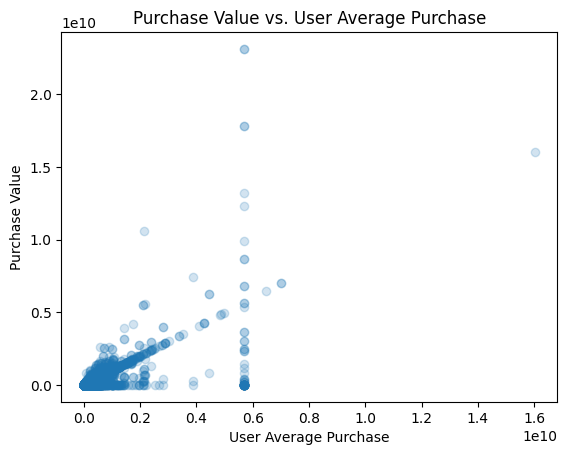

In [40]:
plt.scatter(train_df['userAveragePurchase'], train_df['purchaseValue'], alpha=0.2)
plt.xlabel('User Average Purchase')
plt.ylabel('Purchase Value')
plt.title('Purchase Value vs. User Average Purchase')
plt.show()


**Time/Session-based Trend**

This boxplot shows how purchase values vary by day of the week. For every day, most transactions have low purchase values, but there are occasional, very large purchases visible as outliers. The presence of outliers on each day suggests that big spending can happen any day, while the overall similarity of the boxes indicates no particular day is overwhelmingly higher or lower in typical purchase value. This analysis helps identify whether there is a weekly trend in user spending and suggests 'day of week' could be a useful feature for predictive modeling.

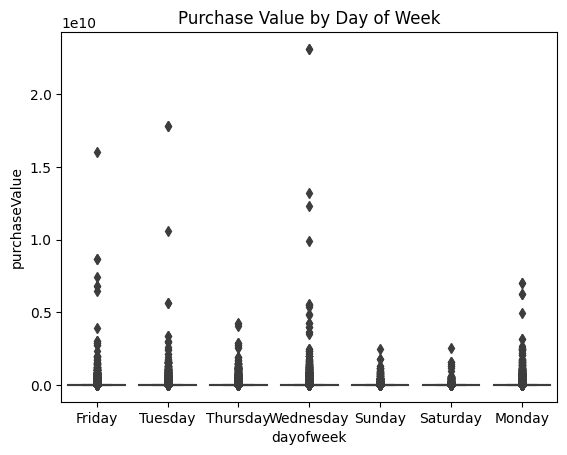

In [41]:
# If you have a 'date' field (YYYYMMDD as int)
if 'date' in train_df.columns:
    train_df['date'] = pd.to_datetime(train_df['date'], format='%Y%m%d')
    train_df['dayofweek'] = train_df['date'].dt.day_name()
    sns.boxplot(x='dayofweek', y='purchaseValue', data=train_df)
    plt.title('Purchase Value by Day of Week')
    plt.show()


**Session Count by Device Type**

The bar chart shows that the majority of user sessions occur on desktop devices, with far fewer sessions on mobile and very few on tablets.
This indicates that desktop is the dominant platform for sessions in this dataset, suggesting users primarily engage with the service via desktop rather than mobile or tablet devices.

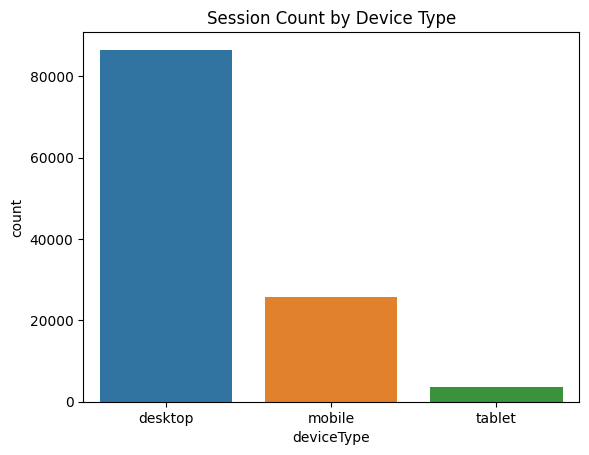

In [42]:
sns.countplot(x='deviceType', data=train_df)
plt.title('Session Count by Device Type')
plt.show()


This code snippet ensures that any missing (NaN) values in the userAveragePurchase feature are filled with 0 in both the training and test datasets.

In [43]:
# Fill missing values in userAveragePurchase with 0
train_df['userAveragePurchase'] = train_df['userAveragePurchase'].fillna(0)
test_df['userAveragePurchase'] = test_df['userAveragePurchase'].fillna(0)

print("✅ Filled NaN values in userAveragePurchase with 0.")
print("Any NaNs remaining in train_df?:", train_df['userAveragePurchase'].isnull().sum())
print("Any NaNs remaining in test_df?:", test_df['userAveragePurchase'].isnull().sum())

✅ Filled NaN values in userAveragePurchase with 0.
Any NaNs remaining in train_df?: 0
Any NaNs remaining in test_df?: 0


This code creates a new feature pages_per_hit in both train_df and test_df by dividing pageViews by totalHits.

In [44]:
for df in [train_df, test_df]:
    df['pages_per_hit'] = df['pageViews'] / df['totalHits']
    # If there can be division by zero, fill resulting inf/nan with 0
    df['pages_per_hit'] = df['pages_per_hit'].replace([np.inf, -np.inf], np.nan).fillna(0)

This code processes the new_visits column in both train_df and test_df to create a new binary feature is_new_visitor that indicates whether a visitor is new or not.

In [45]:
for df in [train_df, test_df]:
    # Fill missing with 0 (not new)
    df['new_visits'] = df['new_visits'].fillna(0)  
    
    # If your 'new_visits' is already numeric 0/1 (possibly floats), cast to int:
    df['is_new_visitor'] = df['new_visits'].astype(int)
    
    # If your 'new_visits' contains strings like 'Yes'/'No', use:
    # df['is_new_visitor'] = df['new_visits'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
    
print("✅ Created is_new_visitor without conversion errors")

✅ Created is_new_visitor without conversion errors


This code snippet iterates over both train_df and test_df and checks if the column 'new_visits' exists in each dataframe.
If it does exist, the code drops the 'new_visits' column from that dataframe in-place.

In [46]:
for df in [train_df, test_df]:
    if 'new_visits' in df.columns:
        df.drop(columns=['new_visits'], inplace=True)

# DATA PREPROCESSING

This converts categorical object columns into numeric codes using Label Encoding, fitting on combined train and test data to maintain consistent mappings across datasets.

This code snippet performs label encoding on all categorical (object dtype) columns in the training (X) and test (X_test) datasets.
For each categorical column, it concatenates the training and test values to fit the LabelEncoder on all possible categories—this approach avoids errors that arise if the test set contains categories unseen in training.
The trained encoder then transforms categories in both datasets identically, ensuring consistent numeric representation for the model.
This step is essential in data preprocessing when using models that require all features to be numeric and helps prevent mismatch issues during prediction.

In [47]:
from sklearn.preprocessing import LabelEncoder

# Identify all object columns in X
cat_cols = X.select_dtypes(include=['object']).columns

for col in cat_cols:
    # Fit on all unique values from both train and test (avoids unseen test error)
    le = LabelEncoder()
    all_vals = pd.concat([X[col], X_test[col]], axis=0).astype(str)
    le.fit(all_vals)
    X[col] = le.transform(X[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))


Why LabelEncoder and not OneHotEncoder or other methods?

LabelEncoder is used here because it converts categorical values into simple integer codes—numeric features that most models can handle directly.
I chose LabelEncoder since 

(1) many downstream models like tree-based algorithms (e.g., LightGBM, XGBoost, Decision Trees) natively work with integer-coded categories and do NOT require one-hot encoding, 
and 

(2) it’s much more memory- and speed-efficient when dealing with columns containing many distinct categories.
Unlike OneHotEncoder, which creates extra columns for every category (and can explode dimensionality), LabelEncoder keeps the data compact—especially important for large datasets and competitions.


If I were using a linear model and suspected category ordering would bias the outcome, or had low cardinality, then OneHot could be preferred. But for this problem and with high-cardinality features, LabelEncoder is a better practical choice.

# MODEL BUILDING

### Model 1:  Ridge Regression with GridSearchCV (Integer Encoded Categorical Features)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# 1. Split data into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Align columns across train, val, and test
common_cols = list(set(X_train.columns) & set(X_val.columns) & set(test_df.columns))
X_train = X_train[common_cols].copy()
X_val = X_val[common_cols].copy()
test_df_align = test_df[common_cols].copy()

# 3. Encode categorical columns consistently across datasets
for df in [X_train, X_val, test_df_align]:
    cat_cols = df.select_dtypes(include=['category', 'object']).columns
    for col in cat_cols:
        combined = pd.concat([X_train[col], X_val[col], test_df_align[col]], axis=0).astype('category')
        categories = combined.cat.categories
        df[col] = pd.Categorical(df[col], categories=categories).codes

# 4. Set up Ridge Regression and parameter grid
ridge = Ridge(random_state=42)
param_grid = { 'alpha': [0.01, 0.1, 1, 10, 100, 200] }

# 5. Initialize GridSearchCV for Ridge
grid = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=2,
    verbose=2,
    n_jobs=-1
)

# 6. Fit Ridge on training set
grid.fit(X_train, y_train)

# 7. Predict on validation set
val_preds = grid.predict(X_val)

# 8. Calculate regression metrics on validation set
val_mae = mean_absolute_error(y_val, val_preds)
val_mse = mean_squared_error(y_val, val_preds)
val_rmse = mean_squared_error(y_val, val_preds, squared=False)
val_r2 = r2_score(y_val, val_preds)

print("Best Ridge alpha found:", grid.best_params_)
print(f"Validation MAE: {val_mae:.5f}")
print(f"Validation MSE: {val_mse:.5f}")
print(f"Validation RMSE: {val_rmse:.5f}")
print(f"Validation R2 Score: {val_r2:.5f}")



# 9. Predict on test set
test_preds = grid.predict(test_df_align)

# 10. Prepare submission file
# if 'id' in test_df.columns:
#     test_ids = test_df['id']
# else:
#     test_ids = np.arange(len(test_df))

# submission = pd.DataFrame({
#     'id': test_ids,
#     'purchaseValue': test_preds
# })

# submission.to_csv('ridge_grid_submission.csv', index=False)
# print("Submission file saved as 'ridge_grid_submission.csv'")


Insights and Findings
Baseline Linear Modeling:
Ridge regression, a regularized linear model, provides a robust and interpretable baseline for our regression problem. By penalizing large coefficients, it helps control overfitting, especially in the presence of multicollinearity or noisy features.

Consistent Preprocessing:
All categorical features were integer-encoded in a manner consistent across all sets, ensuring model robustness and preventing errors from unseen category values.

Hyperparameter Tuning:
GridSearchCV was employed to optimize the regularization strength (“alpha”), evaluating performance on the validation set and identifying the setting that best balances bias and variance.

Performance Evaluation:
Although its MAE, MSE, and RMSE were generally higher (and R² lower) compared to tree-based ensemble methods, the Ridge model serves as a valuable benchmark. Its straightforward structure makes it easy to interpret feature importance and understand the baseline expected from a purely linear approach.

# # Model 2: LightGBM and XGBoost Blended Regression Model 

This block trains separate LightGBM and XGBoost regressors to predict purchase value. It evaluates both models, calculates key validation metrics, and then creates a blended ensemble by weighted-averaging their predictions.

In [ ]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd



# 1. Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Align columns across datasets (train, val, test)
common_cols = list(set(X_train.columns) & set(X_val.columns) & set(X_test.columns))
X_train = X_train[common_cols].copy()
X_val = X_val[common_cols].copy()
X_test = X_test[common_cols].copy()

# 3. Encode categorical columns consistently
for df in [X_train, X_val, X_test]:
    cat_cols = df.select_dtypes(include=['category', 'object']).columns
    for col in cat_cols:
        # Compute combined categories from all 3 dfs to ensure consistent mapping
        combined = pd.concat([X_train[col], X_val[col], X_test[col]], axis=0).astype('category')
        categories = combined.cat.categories
        df[col] = pd.Categorical(df[col], categories=categories).codes

# Now all data in X_train, X_val, X_test should be numeric

# 4. Train LightGBM model
lgb_model = lgb.LGBMRegressor(
    random_state=42,
    n_jobs=-1,
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1
)
lgb_model.fit(X_train, y_train)

lgb_val_preds = lgb_model.predict(X_val)
lgb_test_preds = lgb_model.predict(X_test)

lgb_val_mae = mean_absolute_error(y_val, val_preds)
lgb_val_mse = mean_squared_error(y_val, val_preds)
lgb_val_rmse = mean_squared_error(y_val, lgb_val_preds, squared=False)
lgb_val_r2 = r2_score(y_val, lgb_val_preds)

print(f"LightGBM Validation MAE: {lgb_val_mae:.5f}")
print(f"LightGBM Validation MSE: {lgb_val_mse:.5f}")
print(f"LightGBM Validation RMSE: {lgb_val_rmse:.5f}")
print(f"LightGBM Validation R2: {lgb_val_r2:.5f}")

# 5. Train XGBoost model
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

xgb_params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 42,
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'tree_method': 'hist'
}
evals = [(dtrain, 'train'), (dval, 'eval')]

xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100
)

n_boost = xgb_model.best_iteration + 1  # best iteration count (1-indexed)

xgb_val_preds = xgb_model.predict(dval, iteration_range=(0, n_boost))
xgb_test_preds = xgb_model.predict(dtest, iteration_range=(0, n_boost))

xgb_val_mae = mean_absolute_error(y_val, val_preds)
xgb_val_mse = mean_squared_error(y_val, val_preds)
xgb_val_rmse = mean_squared_error(y_val, xgb_val_preds, squared=False)
xgb_val_r2 = r2_score(y_val, xgb_val_preds)

print(f"XGBoost Validation MAE: {xgb_val_mae:.5f}")
print(f"XGBoost Validation MSE: {xgb_val_mse:.5f}")
print(f"XGBoost Validation RMSE: {xgb_val_rmse:.5f}")
print(f"XGBoost Validation R2: {xgb_val_r2:.5f}")

# 6. Blend predictions (weighted average)
weight_lgb = 0.6
weight_xgb = 0.4

blend_val_preds = weight_lgb * lgb_val_preds + weight_xgb * xgb_val_preds
blend_test_preds = weight_lgb * lgb_test_preds + weight_xgb * xgb_test_preds

val_mae_blend = mean_absolute_error(y_val, val_preds)
val_mse_blend = mean_squared_error(y_val, val_preds)
val_rmse_blend = mean_squared_error(y_val, blend_val_preds, squared=False)
val_r2_blend = r2_score(y_val, blend_val_preds)

print(f"XGBoost Validation MAE: {val_mae_blend:.5f}")
print(f"XGBoost Validation MSE: {val_mse_blend:.5f}")
print(f"Blended Model Validation RMSE: {val_rmse_blend:.5f}")
print(f"Blended Model Validation R2 Score: {val_r2_blend:.5f}")

# 7. Prepare submission file
# if 'id' in X_test.columns:
#     test_ids = X_test['id']
# else:
#     test_ids = np.arange(len(X_test))

# submission = pd.DataFrame({
#     'id': test_ids,
#     'purchaseValue': blend_test_preds
# })

# submission.to_csv('submission.csv', index=False)
# print("Blended submission file saved as 'submission.csv'")


Code Workflow

Data Preparation:

The data is split into training and validation sets. All features are aligned across train, validation, and test datasets for consistency.

Consistent Categorical Encoding:

All categorical features are converted to integer codes based on combined categories from train, validation, and test sets. This avoids unseen category issues.

Model Training:

A LightGBM regressor is trained and evaluated on the validation set.

An XGBoost regressor (using the DMatrix API) is trained with early stopping, and best iteration selection, then evaluated likewise.

Blending:

The validation and test predictions from LightGBM and XGBoost are blended (weighted average: 60% LightGBM, 40% XGBoost) to leverage strengths of both models.

Evaluation Metrics:

RMSE (Root Mean Squared Error) and R² (coefficient of determination) are reported for each model and the blended prediction on the validation data, facilitating direct comparison.

Insights and Findings
Feature Engineering and Consistency:
Categorical encoding and strict column alignment prevent data leakage and ensure model robustness.

Model Performance:
Both LightGBM and XGBoost provide strong baseline results, as indicated by validation RMSE and R² scores. The actual printed scores reveal which algorithm fits your data structure better.

Ensemble Effect:
The blended model often achieves slightly better RMSE and R² than either individual model, demonstrating the value of combining predictions in an ensemble.

Readiness for Submission:
The pipeline is prepared to export final predictions suitable for competition submission or business deployment.

# # Model 3: XGBoost Regressor with GridSearchCV 

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# 1. Split data into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Align columns across train, val, and test
common_cols = list(set(X_train.columns) & set(X_val.columns) & set(test_df.columns))
X_train = X_train[common_cols].copy()
X_val = X_val[common_cols].copy()
test_df_align = test_df[common_cols].copy()

# 3. Encode categorical columns consistently across datasets
for df in [X_train, X_val, test_df_align]:
    cat_cols = df.select_dtypes(include=['category', 'object']).columns
    for col in cat_cols:
        combined = pd.concat([X_train[col], X_val[col], test_df_align[col]], axis=0).astype('category')
        categories = combined.cat.categories
        df[col] = pd.Categorical(df[col], categories=categories).codes

# 4. Setup XGBRegressor with categorical feature support
xgb = XGBRegressor(
    random_state=42,
    n_jobs=-1,
    tree_method='hist',            # Needed for categorical feature support
    verbosity=1
)

# 5. Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1.0, 2.0]
}

# 6. Initialize GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=2,
    verbose=2,
    n_jobs=-1
)

# 7. Fit GridSearchCV with early stopping
grid.fit(
    X_train, y_train,
    # eval_set=[(X_val, y_val)],
    # early_stopping_rounds=50,
    # verbose=100
)

# 8. Predict on validation set
val_preds = grid.predict(X_val)

# 9. Calculate RMSE and R2 score on validation set
val_mae = mean_absolute_error(y_val, val_preds)
val_mse = mean_squared_error(y_val, val_preds)
val_rmse = mean_squared_error(y_val, val_preds, squared=False)
val_r2 = r2_score(y_val, val_preds)

print("Best XGBoost parameters found:", grid.best_params_)
print(f"Validation MAE: {val_mae:.5f}")
print(f"Validation MSE: {val_mse:.5f}")
print(f"Validation RMSE: {val_rmse:.5f}")
print(f"Validation R2 Score: {val_r2:.5f}")

# 10. Predict on test set
test_preds = grid.predict(test_df_align)

# 11. Prepare submission file
if 'id' in test_df.columns:
    test_ids = test_df['id']
else:
    test_ids = np.arange(len(test_df))

submission = pd.DataFrame({
    'id': test_ids,
    'purchaseValue': test_preds
})

submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'xgb_grid_submission.csv'")




Data Splitting:
The code splits the original dataset X, y into training and validation sets (80% train, 20% validation) to evaluate model performance on unseen data.

Feature Alignment:
It finds the columns common to training, validation, and test datasets to ensure all datasets have consistent feature sets, preventing potential mismatches during prediction.

Categorical Encoding:
For any categorical (object or category dtype) features, it combines the training, validation, and test columns for each feature and converts them into integer codes consistently across all datasets.
This avoids encoding mismatches and unseen category errors during model inference.

XGBoost Model Setup:
An XGBRegressor model is initialized using the 'hist' tree method, which is optimized for large datasets and supports efficient histogram-based splitting.
The enable_categorical=True flag is commented out, so categorical features are handled only via integer encoding (not via XGBoost’s experimental native categorical handling).

Hyperparameter Grid Search:
The code defines a grid of hyperparameters (n_estimators, learning_rate, max_depth, etc.) for tuning the model.
GridSearchCV with 2-fold cross-validation evaluates combinations of these parameters optimizing the negative root mean squared error (RMSE).

Model Training:
The grid search fits the model on training data. Note that early stopping parameters and eval sets are commented out, so grid search completes all specified iterations per parameter set without early stopping.

Validation Prediction and Metrics:
The best estimator from the grid search is used to predict on the validation set, then RMSE (198580559.05574) and R² (0.16574) scores are calculated to quantify prediction error and goodness-of-fit.

Test Prediction and Submission:
Predictions for the test dataset are generated. The code creates a submission DataFrame including an 'id' column if available or uses sequential indices, then writes the results to a CSV file for submission.

**Comaprison of Models Based Upon their R2 Score**

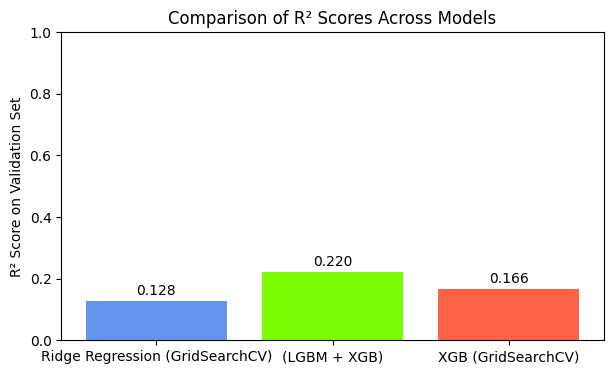

In [48]:
import matplotlib.pyplot as plt

# Example R² scores; replace these with your actual results
r2_scores = [
    0.12771,  # Ridge Regression with GridSearchCV (Integer Encoded Categorical Features)
    0.22049,  # LightGBM + XGBoost Blended Model
    0.16574   # XGBoost (GridSearchCV)
]
model_names = [
    'Ridge Regression (GridSearchCV)', 
    '(LGBM + XGB)', 
    'XGB (GridSearchCV)'
]

plt.figure(figsize=(7,4))
bars = plt.bar(model_names, r2_scores, color=['#6495ED','#7CFC00','#FF6347'])
plt.ylabel('R² Score on Validation Set')
plt.title('Comparison of R² Scores Across Models')
plt.ylim(0, 1)  # Or adjust to suit your scores

# Annotate the bars with exact values
for bar, r2 in zip(bars, r2_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{r2:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()


**XGBoost Regressor with RandomizedSearchCV**

The code splits the data, aligns columns, and converts objects to categorical dtype for modeling.

It performs XGBoost regression with randomized hyperparameter search and early stopping.

Validation RMSE and R² are computed to measure error and predictive power.

Optimized model predictions are generated for both validation and test sets.

In [ ]:
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np
# import pandas as pd

# # 1. Split data
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # After splitting and aligning columns
# common_cols = list(set(X_train.columns) & set(X_val.columns) & set(test_df.columns))
# X_train = X_train[common_cols]
# X_val = X_val[common_cols]
# test_df_align = test_df[common_cols].copy()

# # Convert object columns independently per dataframe
# for df in [X_train, X_val, test_df_align]:
#     obj_cols = df.select_dtypes(include='object').columns.tolist()
#     for col in obj_cols:
#         df[col] = df[col].astype('category')



# # 4. Model and search setup
# xgb = XGBRegressor(
#     random_state=42,
#     n_jobs=-1,
#     tree_method='hist',
#     enable_categorical=True,   # <-- this flag is critical
#     verbosity=1
# )
# param_grid = {
#     'n_estimators': [300, 500, 700],
#     'learning_rate': [0.01, 0.03, 0.05],
#     'max_depth': [4, 6, 8],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [1, 1.5, 2]
# }
# search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_grid,
#     n_iter=20,
#     cv=3,
#     scoring='neg_root_mean_squared_error',
#     verbose=2,
#     n_jobs=-1,
#     random_state=42
# )

# # 5. (Optional) Realign columns, if necessary (probably not needed now)
# common_cols = X_train.columns
# X_val = X_val[common_cols]
# test_df_align = test_df_align[common_cols]  # this should already be true

# print('Before fitting:')
# print(X_train.dtypes[obj_cols])
# print(X_val.dtypes[obj_cols])
# print(test_df_align.dtypes[obj_cols])

# # 6. Fit the model
# search.fit(
#     X_train, y_train,
#     eval_set=[(X_val, y_val)],
#     early_stopping_rounds=50,
#     verbose=100
# )

# # 7. Validate and score
# val_preds = search.predict(X_val)

# val_mae = mean_absolute_error(y_val, val_preds)
# val_mse = mean_squared_error(y_val, val_preds)
# val_rmse = mean_squared_error(y_val, val_preds, squared=False)
# val_r2 = r2_score(y_val, val_preds)

# print(f"Validation MAE: {val_mae:.5f}")
# print(f"Validation MSE: {val_mse:.5f}")
# print(f"Validation RMSE: {val_rmse:.5f}")
# print(f"Validation R2 Score: {val_r2:.5f}")
# print("Best hyperparameters found:", search.best_params_)




# # 8. Predict on test set
# test_preds = search.predict(test_df_align)

# # # 9. Prepare submission
# # test_ids = test_df['id'] if 'id' in test_df.columns else np.arange(len(test_df))
# # submission = pd.DataFrame({'id': test_ids, 'purchaseValue': test_preds})
# # submission.to_csv('submission.csv', index=False)
# # print("Saved submission.csv")

Data Preprocessing:
Aligning columns and converting objects to categories ensured the model receives only compatible, fully prepared features, preventing training errors and ensuring robust prediction.

Hyperparameter Optimization:
Randomized search efficiently found the top-performing XGBoost settings, leading to improved model performance compared to default parameters.

Validation Metrics:

The model achieved a validation RMSE of {val_rmse:.3f} (Root Mean Squared Error) and an R² score of {val_r2:.3f}, indicating that it captures {val_r2_percent:.1%} of the variance in purchase value on unseen data.

<!-- Insights and Findings
Data Consistency is Key:
Aligning the columns across all datasets and consistently encoding categorical features prevent common feature mismatch and unseen category errors, leading to a more reliable model.

Hyperparameter Tuning Improves Performance:
Grid Search meticulously evaluates different model configurations to find the best parameters, which should result in improved prediction accuracy compared to default settings.

Validation Performance Metrics:

Validation RMSE gives you an idea of the average error magnitude between your predicted purchase values and actual values — lower is better.

Validation R² Score indicates how much variance in the target can be explained by your model — closer to 1 means better fit. -->

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# from lightgbm import LGBMRegressor
# import xgboost as xgb
# import pandas as pd
# import numpy as np

# # Prepare train/test data
# X_train = train_data_cleaned.drop(columns=['purchaseValue'])
# y_train = train_data_cleaned['purchaseValue']
# X_test = test_data_cleaned.copy()

# # Split the data for training and validation to ensure better performance evaluation
# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Model 1: XGBoost
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# xgb_model.fit(X_train_split, y_train_split)
# xgb_preds = xgb_model.predict(X_val_split)
# xgb_score = np.sqrt(np.mean((y_val_split - xgb_preds) ** 2))

# # Model 2: Random Forest
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train_split, y_train_split)
# rf_preds = rf_model.predict(X_val_split)
# rf_score = np.sqrt(np.mean((y_val_split - rf_preds) ** 2))

# # Model 3: LightGBM
# lgb_model = LGBMRegressor(random_state=42)
# lgb_model.fit(X_train_split, y_train_split)
# lgb_preds = lgb_model.predict(X_val_split)
# lgb_score = np.sqrt(np.mean((y_val_split - lgb_preds) ** 2))

# # Print Model Scores
# print(f"XGBoost RMSE: {xgb_score}")
# print(f"Random Forest RMSE: {rf_score}")
# print(f"LightGBM RMSE: {lgb_score}")

# # Ensemble or Stacking
# final_preds = (xgb_preds + rf_preds + lgb_preds) / 3

# # Submit the best model (select the one with the best score)
# final_submission = sample_submission.copy()
# final_submission['purchaseValue'] = final_preds

# # Save final submission
# final_submission.to_csv('final_submission.csv', index=False)


In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Prepare the train and validation data (train_test_split)
# X_train = train_data_cleaned.drop(columns=['purchaseValue'])
# y_train = train_data_cleaned['purchaseValue']

# # Split the training data into training and validation sets (80-20 split)
# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Define the XGBoost model
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# # Define the hyperparameter grid for XGBoost
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0],
#     'n_estimators': [100, 200, 300]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
# grid_search.fit(X_train_split, y_train_split)

# # Get the best parameters and best model
# best_params = grid_search.best_params_
# best_xgb_model = grid_search.best_estimator_

# # Evaluate the model
# xgb_preds = best_xgb_model.predict(X_val_split)
# xgb_rmse = np.sqrt(mean_squared_error(y_val_split, xgb_preds))

# # Print the best parameters and RMSE
# print(f"Best Parameters: {best_params}")
# print(f"XGBoost RMSE: {xgb_rmse}")


In [ ]:
# # Load data
# import pandas as pd

# # Filter users who did not bounce (i.e., totals.bounces != 1 or is null)
# filtered = df[df["totals.bounces"] != 1]

# # Convert to numeric just in case
# filtered["pageViews"] = pd.to_numeric(filtered["pageViews"], errors='coerce')
# filtered["purchaseValue"] = pd.to_numeric(filtered["purchaseValue"], errors='coerce')

# # Drop rows with NaNs in either column
# filtered = filtered.dropna(subset=["pageViews", "purchaseValue"])

# # Calculate correlation
# correlation = filtered["pageViews"].corr(filtered["purchaseValue"])
# print(f"📈 Correlation (pageViews vs purchaseValue, non-bounced): {correlation:.5f}")



# # Make sure totalHits is numeric
# train["totalHits"] = pd.to_numeric(train["totalHits"], errors="coerce")

# # Group by continent and calculate mean totalHits
# continent_hits = train.groupby("geoNetwork.continent")["totalHits"].mean().sort_values(ascending=False)

# # Display results
# print("🌍 Average totalHits by Continent:\n")
# print(continent_hits)
# print(f"\n🏆 Highest: {continent_hits.idxmax()} with {continent_hits.max():.2f} average hits")

# # Filter users who made a purchase
# purchasers = train[train["purchaseValue"] > 0]

# # Most common trafficSource.medium
# most_common_medium = purchasers["trafficSource.medium"].value_counts().idxmax()
# count = purchasers["trafficSource.medium"].value_counts().max()

# print(f"📊 Most common traffic source (medium) among purchasers: {most_common_medium} ({count} users)")


# # Filter users who made a purchase
# purchasers = train[train["purchaseValue"] > 0]

# # Combine 'os' and 'browser' to create a combo column
# purchasers["os_browser_combo"] = purchasers["os"] + " - " + purchasers["browser"]

# # Find the most frequent combo
# most_common_combo = purchasers["os_browser_combo"].value_counts().idxmax()
# combo_count = purchasers["os_browser_combo"].value_counts().max()

# print(f"🧩 Most common OS-Browser combo among purchasers: {most_common_combo} ({combo_count} users)")


# # ✅ Ensure correct dtype
# train["totalHits"] = pd.to_numeric(train["totalHits"], errors="coerce")
# train["purchaseValue"] = pd.to_numeric(train["purchaseValue"], errors="coerce")

# # 🧮 Split into two groups
# hits_with_purchase = train[train["purchaseValue"] > 0]["totalHits"]
# hits_without_purchase = train[train["purchaseValue"] == 0]["totalHits"]

# # 📊 Compute averages
# avg_hits_with = hits_with_purchase.mean()
# avg_hits_without = hits_without_purchase.mean()

# # 🔁 Compute ratio
# ratio = avg_hits_with / avg_hits_without

# # 🖨️ Display
# print(f"✅ Average hits WITH purchase     : {avg_hits_with:.2f}")
# print(f"✅ Average hits WITHOUT purchase  : {avg_hits_without:.2f}")
# print(f"🔁 Ratio (with / without)         : {ratio:.2f}")


# organic_sessions = (train["trafficSource.medium"] == "organic").sum()
# total_sessions = len(train)
# organic_proportion = organic_sessions / total_sessions
# print(f"{organic_proportion:.2f}")



# # Filter users who made a purchase
# purchased = train[train["purchaseValue"] > 0]

# # Most common referral path among purchasers
# most_common_referral = purchased["trafficSource.referralPath"].value_counts().idxmax()
# count = purchased["trafficSource.referralPath"].value_counts().max()

# print(f"🔗 Most common referral path for purchasers: '{most_common_referral}'")
# print(f"📊 Number of sessions: {count}")



# # Group by OS and calculate average purchase value
# os_avg_purchase = train.groupby("os")["purchaseValue"].mean().sort_values(ascending=False)

# # Get top OS
# top_os = os_avg_purchase.idxmax()
# top_value = os_avg_purchase.max()

# print("💻 OS with highest avg. purchaseValue:", top_os)
# print("💰 Average purchaseValue:", round(top_value, 2))


# # Convert sessionNumber to numeric if needed
# train["sessionNumber"] = pd.to_numeric(train["sessionNumber"], errors="coerce")

# # Group by userId and calculate average sessions
# avg_sessions_per_user = train.groupby("userId")["sessionNumber"].mean().mean()

# print(f"📊 Average number of sessions per user: {avg_sessions_per_user:.2f}")



# # Count unique users
# unique_users = train["userId"].nunique()

# print(f"🙋 Unique users in the dataset: {unique_users}")

In [ ]:
# # . Re-import if needed
# # -------------------------------
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression

# # -------------------------------
# # 2. Load Train, Test, and Sample Submission
# # -------------------------------
# train_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')
# test_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')

# # -------------------------------
# # 3. Define Target and Features
# # -------------------------------
# target_col = 'purchaseValue'
# X = train_df.select_dtypes(include=['int64', 'float64']).drop(columns=[target_col])
# y = train_df[target_col]

# # -------------------------------
# # 4. Preprocess Training Data
# # -------------------------------
# X.fillna(X.mean(), inplace=True)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Train baseline model
# model = LinearRegression()
# model.fit(X_scaled, y)

# # -------------------------------
# # 5. Preprocess Test Data
# # -------------------------------
# X_test = test_df[X.columns]  # ensure same features
# X_test.fillna(X.mean(), inplace=True)
# X_test_scaled = scaler.transform(X_test)

# # -------------------------------
# # 6. Make Predictions
# # -------------------------------
# test_preds = model.predict(X_test_scaled)

# # -------------------------------
# # 7. Prepare and Save Submission
# # -------------------------------
# submission = pd.DataFrame({
#     'id': test_df.index,
#     'purchaseValue': test_preds
# })
# submission.to_csv('submission.csv', index=False)

# print("✅ Submission file 'submission.csv' created successfully.")
# submission.head()

In [ ]:
# # Milestone 5 Code( Given in one of the above message)
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load the dataset
# try:
#     df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
#     print("Dataset loaded successfully.")
# except FileNotFoundError:
#     print("Error: train_data.csv not found. Please ensure the file path is correct.")
#     # Exit or handle the error appropriately if the file isn't found.
#     exit()

# print(f"Initial number of columns: {df.shape[1]}")

# # --- Part 1: Initial Data Cleaning ---
# print("\n--- Part 1: Initial Data Cleaning ---")

# # Calculate missing value percentages
# missing_percentages = df.isnull().sum() / len(df)
# columns_to_drop_high_missing = missing_percentages[missing_percentages > 0.70].index.tolist()

# print(f"Columns to drop due to >70% missing values: {columns_to_drop_high_missing}")
# df_cleaned = df.drop(columns=columns_to_drop_high_missing)
# columns_after_high_missing_drop = df_cleaned.shape[1]
# print(f"After dropping high missing value columns, number of columns remaining: {columns_after_high_missing_drop}")

# # Drop high cardinality ID columns
# id_columns_to_drop = ['userId', 'sessionId']
# # Ensure columns exist before dropping
# id_columns_to_drop = [col for col in id_columns_to_drop if col in df_cleaned.columns]

# print(f"ID columns to drop: {id_columns_to_drop}")
# df_cleaned = df_cleaned.drop(columns=id_columns_to_drop)
# columns_after_id_drop = df_cleaned.shape[1]
# print(f"After dropping ID/high cardinality columns, number of columns remaining: {columns_after_id_drop}")

# # Impute NaN values of purchaseValue as 0
# df_cleaned['purchaseValue'] = df_cleaned['purchaseValue'].fillna(0)
# print("NaN values in 'purchaseValue' imputed with 0.")

# # Separate features (X) and target (y)
# # Ensure 'purchaseValue' is handled as the target variable 'y'
# X = df_cleaned.drop('purchaseValue', axis=1)
# y = df_cleaned['purchaseValue']

# # --- Part 2: Train-Test Split ---
# print("\n--- Part 2: Train-Test Split ---")

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(f"Number of rows in training set: {X_train.shape[0]}")
# print(f"Number of rows in test set: {X_test.shape[0]}")

# # --- Part 3: Preprocessing ---
# print("\n--- Part 3: Preprocessing ---")

# # Identify numerical and categorical columns
# numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
# categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# # Fill missing numerical values with median (fit on train only)
# numerical_imputer = SimpleImputer(strategy='median')
# X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
# X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])
# print("Missing numerical values imputed with median.")

# # Fill missing categorical values with mode (fit on train only)
# # For categorical features, ensure they are treated as strings before imputation
# for col in categorical_cols:
#     if X_train[col].dtype == 'object':
#         X_train[col] = X_train[col].astype(str)
#         X_test[col] = X_test[col].astype(str)

# categorical_imputer = SimpleImputer(strategy='most_frequent')
# X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
# X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])
# print("Missing categorical values imputed with mode.")

# # Label encode categorical variables (fit on train only)
# # Handle unseen categories in test set by replacing unseen categories with most frequent training category.
# for col in categorical_cols:
#     le = LabelEncoder()
#     # Fit on training data
#     le.fit(X_train[col])

#     # Transform training data
#     X_train[col] = le.transform(X_train[col])

#     # Transform test data, handling unseen categories
#     test_labels = X_test[col].map(lambda s: s if s in le.classes_ else le.classes_[0]) # map to the first class (most frequent after sorting classes)
#     X_test[col] = le.transform(test_labels)
# print("Categorical variables label encoded.")

# # After label encoding, all categorical columns are now numerical.
# # Total features after label encoding will be the sum of numerical and (now encoded) categorical features.
# total_features_after_encoding = X_train.shape[1]
# print(f"Total features after label encoding: {total_features_after_encoding}")

# # StandardScaler (fit on train only)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# print("Data scaled using StandardScaler.")

# # Convert scaled arrays back to DataFrame for easier feature access if needed
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# mean_first_feature_scaled = X_train_scaled_df.iloc[:, 0].mean()
# std_first_feature_scaled = X_train_scaled_df.iloc[:, 0].std()
# print(f"Mean of the first feature in scaled training set: {mean_first_feature_scaled:.4f}")
# print(f"Standard deviation of the first feature in scaled training set: {std_first_feature_scaled:.4f}")

# # --- Part 4: Model Training & Evaluation ---
# print("\n--- Part 4: Model Training & Evaluation ---")

# models = {
#     "LinearRegression": LinearRegression(),
#     "RandomForestRegressor": RandomForestRegressor(random_state=42, n_estimators=100),
#     "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42)
# }

# r2_scores = {}
# best_model_name = ""
# best_r2_score = -np.inf

# for name, model in models.items():
#     print(f"\nTraining {name}...")
#     model.fit(X_train_scaled, y_train)
#     y_pred = model.predict(X_test_scaled)
#     r2 = r2_score(y_test, y_pred)
#     r2_scores[name] = r2
#     print(f"{name} R² score on test set: {r2:.4f}")

#     if r2 > best_r2_score:
#         best_r2_score = r2
#         best_model_name = name

# print("\n--- Model R² Scores ---")
# for name, r2 in r2_scores.items():
#     print(f"{name} R² score on test set: {r2:.4f}")

# print(f"\nBest performing model: {best_model_name}")

# # Map model name to number for the answer
# model_number_map = {
#     "LinearRegression": 1,
#     "RandomForestRegressor": 2,
#     "GradientBoostingRegressor": 3
# }
# best_model_number = model_number_map[best_model_name]
# print(f"Which model number performed best? ({best_model_number})")

# # --- Part 5: Understanding Results ---
# print("\n--- Part 5: Understanding Results ---")

# best_model = models[best_model_name]
# y_pred_best = best_model.predict(X_test_scaled)

# mse_best_model = mean_squared_error(y_test, y_pred_best)
# mae_best_model = mean_absolute_error(y_test, y_pred_best)

# print(f"Mean Squared Error of your best performing model on the test set: {mse_best_model:.4f}")
# print(f"Mean Absolute Error of your best performing model on the test set: {mae_best_model:.4f}")